# Import Library yang dibutuhkan

In [1]:
!pip install emoji

import pandas as pd
import re
import emoji
import unicodedata
import matplotlib.pyplot as plt
from typing import List, Optional
from google.colab import drive

# Mount Google Drive (for Colab)

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Definisikan Kelas Textpreprocessor

In [3]:
class TextPreprocessor:
    """Class to handle text preprocessing operations."""

    def __init__(self):
        self.slang_dict = self._load_slang_dictionary()
        print(f"TextPreprocessor initialized with {len(self.slang_dict)} slang words")

    def _load_slang_dictionary(self) -> dict:
        """Load Indonesian slang words dictionary."""
        return {
            "gk": "tidak", "gak": "tidak", "g": "tidak", "tdk": "tidak", "ga": "tidak",
            "nggak": "tidak", "enggak": "tidak", "gpp": "tidak apa-apa",
            "gakpapa": "tidak apa-apa", "tp": "tapi", "tapi": "tetapi",
            "kl": "kalau", "klw": "kalau", "kalo": "kalau", "klo": "kalau",
            "krn": "karena", "karena": "sebab", "jd": "jadi", "sdh": "sudah",
            "udh": "sudah", "udah": "sudah", "dl": "dulu",
            "sm": "sama", "sama": "dengan", "dg": "dengan", "dr": "dari",
            "utk": "untuk", "yg": "yang", "jg": "juga", "d": "di",
            "dll": "dan lain-lain", "dst": "dan seterusnya", "ttp": "tetap",
            "tsb": "tersebut", "dlm": "dalam", "pdhl": "padahal",
            "mrk": "mereka", "sy": "saya", "gw": "saya", "gue": "saya",
            "gua": "saya", "w": "saya", "gwe": "saya", "km": "kamu",
            "lu": "kamu", "lo": "kamu", "q": "aku", "ak": "aku",
            "aq": "aku", "elo": "kamu", "elu": "kamu", "loe": "kamu",
            "mnrt": "menurut", "spt": "seperti", "bener": "benar", "kok": "mengapa",
            "lg": "lagi", "bgt": "banget", "banget": "sekali", "cm": "cuma",
            "cuman": "cuma", "emg": "memang", "emng": "memang",
            "bs": "bisa", "bsa": "bisa", "sabi": "bisa",
            "bikin": "membuat", "ksih": "kasih", "ksh": "kasih",
            "jgn": "jangan", "jngn": "jangan",
            "biar": "agar", "supaya": "agar",
            "anjay": "astaga", "anjir": "astaga", "anjrit": "astaga",
            "wkwk": "haha", "wkwkwk": "haha", "wk": "haha", "lol": "haha",
            "ngakak": "tertawa", "santuy": "santai", "woles": "santai", "mager": "malas",
            "gabut": "tidak ada kerjaan", "baper": "terbawa perasaan",
            "kepo": "penasaran", "julid": "iri", "gibah": "bergosip",
            "panik": "takut", "cape": "capek", "capekkk": "capek",
            "pusinggg": "pusing", "skuy": "ayo", "gas": "ayo", "gaskeun": "ayo",
            "mantul": "bagus", "uhuy": "mantap", "mantab": "mantap",
            "kocak": "lucu", "ngeri": "hebat", "goks": "hebat",
            "pecah": "seru", "smg": "semoga",
            "receh": "tidak penting", "lebay": "berlebihan", "php": "pemberi harapan palsu",
            "auto": "langsung", "halu": "berkhayal",
            "ngab": "teman", "cuy": "teman", "ngabers": "remaja pria",
            "bro": "saudara", "sis": "kakak", "tmn": "teman",
            "tmn2": "teman-teman", "bocil": "anak kecil", "org": "orang",
            "bang": "kakak", "bg": "kakak", "bng": "kakak", "kak": "kakak",
            "min": "minimal", "jp": "jackpot", "jepe": "jackpot", "jepey": "jackpot",
            "bonus": "hadiah", "depo": "deposit", "wd": "withdraw",
            "bet": "banget", "gmpng": "mudah", "gampang": "mudah",
            "win": "menang", "modal": "uang", "betting": "taruhan",
            "slot": "permainan judi", "event": "acara", "promo": "promosi",
            "gacr": "gacor", "gcr": "gacor",
            "mekswin": "maxwin", "gacir": "gacor", "y": "ya", "kn": "kan", "cs" : "dan kawan kawan",
            "dri": "dari", "msk": "masuk", "thn": "tahun", "th": "tahun", "korup": "korupsi",
            "ortu": "orang tua", "jekpot": "jackpot", "ny": "nya", "mmg": "memang", "klihatan": "terlihat",
            "keliatan": "terlihat", "demen": "suka", "kayak": "seperti", "dah": "sudah", "knp": "kenapa",
            "wtf": "astaga", "sosmed": "sosial media", "gaspol": "ayo", "maen": "main",
            "judol": "judi online", "smpe": "sampai", "sampe": "sampai", "nyampe": "sampai",
            "pinjol": "pinjaman online", "ntar": "nanti", "nnti": "nanti", "nti": "nanti",
            "gini": "seperti ini", "gni": "seperti ini", "begini": "seperti ini", "bpk": "bapak",
            "bp": "bapak", "tilep": "mengambil", "mirip": "seperti", "mrp": "seperti", "drpd": "daripada",
            "thdp": "terhadap", "jga": "juga", "mngkin": "mungkin", "ap": "apa", "bkl": "akan",
            "bakal": "akan", "mna": "dimana", "mn": "dimana", "mana": "dimana", "cilik": "kecil",
            "pny": "punya", "wong": "orang", "msh": "masih", "sj": "saja", "pk": "bapak", "dn": "dan"
        }

    def normalize_unicode_to_ascii(self, text: str) -> str:
        """Convert Unicode characters to their closest ASCII representation."""
        if not isinstance(text, str):
            return text
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    def replace_slang(self, text: str) -> str:
        """Replace Indonesian slang words with their formal equivalents."""
        if not isinstance(text, str):
            return text

        words = text.split()
        new_words = [self.slang_dict.get(word.lower(), word) for word in words]
        return ' '.join(new_words)

    def clean_text(self, text: str) -> str:
        """Clean and normalize text by removing unwanted characters and formatting."""
        if not isinstance(text, str):
            return ""

        # Convert to lowercase
        text = text.lower()

        # Handle emojis
        text = emoji.demojize(text)  # Convert emoji to text :emoji_name:
        text = re.sub(r':[a-zA-Z_]+:', ' ', text)  # Remove :emoji_name:

        # Remove standalone numbers but keep numbers attached to words
        text = re.sub(r'\b\d+\b', '', text)

        # Remove non-alphanumeric characters except spaces
        text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text

    def preprocess_text(self, text: str) -> str:
        """Apply complete text preprocessing pipeline."""
        text = self.normalize_unicode_to_ascii(text)
        text = self.replace_slang(text)
        text = self.clean_text(text)
        return text

# Definisikan Kelas GamblingLabelProcessor

In [4]:
class GamblingLabelProcessor:
    """Class to handle gambling content labeling."""

    def __init__(self):
        self.gambling_keywords = self._load_gambling_keywords()
        print(f"GamblingLabelProcessor initialized with {len(self.gambling_keywords)} keywords")

    def _load_gambling_keywords(self) -> List[str]:
        """Load gambling-related keywords for detection."""
        return [
            'gacor', 'g4cor', 'jepe', 'jp', 'jackpot', 'bonus', 'b0nus',
            'menang', 'm3nang', 'menang terus', 'spin', 'free spin', 'auto win',
            'maxwin', 'big win', 'winrate', 'win terus', 'jp terus',
            'cuan', 'cu4n', 'wd', 'withdraw', 'depo', 'deposit', 'withdrawal',
            'saldo', 'modal', 'modal receh', 'turnover', 'rollingan', 'komisi',
            'sl0t', 'slot', 'slot online', 'game slot', 'slot terpercaya',
            'slot terbaru', 'slot maxwin', 'slot pragmatic', 'slot demo',
            'slot terbaru hari ini', 'slot tergacor', 'slot terbaik',
            'slot mudah menang', 'slot hari ini', 'slot online terpercaya',
            'live casino', 'casino', 'toto', 'togel',
            'judi', 'bet', 'betting', 'bandar', 'pola', 'rtp tinggi', 'rtp slot',
            'klaim', 'hoki', 'daftar sekarang', 'join sekarang', 'link alternatif',
            'login disini', 'klik disini', 'claim sekarang', 'main disini',
            'langsung gas', 'pr0m0', 'promo', 'promo deposit', 'promosi slot',
            'event', 'event harian', 'event mingguan', 'event slot',
            'spin gratis', 'tembus', 'cuan terus',
            'deposit via dana', 'via gopay', 'via ovo', 'via pulsa',
            'pr0be855', 'dora77', 'weton88', 'pulauwin', '25kbet', 'alexis17',
            'alexis', 'berkah99', 'aero88', 'sgi88', 'pluto88', 'garudahoki',
            'mona4d', 'berlian', 'btv', 'xuxu4d', 'pstoto99', 'gunungwin',
            'ayamwin', 'pulau777', 'zeus', 'kusumat0t0', 'dora', 'supermoney88',
            'link slot', 'link gacor', 'situs', 'situs terpercaya', 'pecahan', 'toto328',
            'victory007', 'hoki777', 'pawpaw4d', 'a l e x i s', 'd o r a', 'manjurbet', '5unsur2',
            'radar138', 'kyt4d', 'pokerbola', 'paludewa919', 'thor311', 'koreo138', 'indo911',
            'sugus4d', 'miya88', 'suhu328', 'yuk88', 'axl777', 'king328', 'asiagenting'
        ]

    def is_gambling_comment(self, comment: str) -> int:
        """
        Check if a comment contains gambling-related content.

        Args:
            comment: Processed comment text

        Returns:
            1 if gambling content detected, 0 otherwise
        """
        if not isinstance(comment, str):
            return 0

        words = comment.lower().split()
        return 1 if any(keyword in words for keyword in self.gambling_keywords) else 0

    def get_detected_keywords(self, comment: str) -> List[str]:
        """Get list of gambling keywords detected in a comment."""
        if not isinstance(comment, str):
            return []

        words = comment.lower().split()
        detected = [keyword for keyword in self.gambling_keywords if keyword in words]
        return detected

## Inisialisasi Kelas

In [5]:
# Initialize the processors
text_processor = TextPreprocessor()
label_processor = GamblingLabelProcessor()

TextPreprocessor initialized with 197 slang words
GamblingLabelProcessor initialized with 133 keywords


# Data Loading

In [6]:
# Define url
github_urls = [
    "https://raw.githubusercontent.com/HAJAR-Enterprise/ML-Repo/refs/heads/main/Datasets/komentar_judi.csv",
    "https://raw.githubusercontent.com/HAJAR-Enterprise/ML-Repo/refs/heads/main/Datasets/komentar_youtube_1.csv",
    "https://raw.githubusercontent.com/HAJAR-Enterprise/ML-Repo/refs/heads/main/Datasets/komentar_youtube_2.csv"
]

# Load datasets
dataframes = []
for url in github_urls:
    try:
        df = pd.read_csv(url)
        dataframes.append(df)
        print(f"Loaded {url}: {len(df)} rows")
        print(f"Columns: {list(df.columns)}\n")
    except Exception as e:
        print(f"Error loading {url}: {str(e)}")

# Combine datasets
if dataframes:
    df_combined = pd.concat(dataframes, ignore_index=True)
    print(f"\n✅ Combined dataset shape: {df_combined.shape}")
    print(f"   Columns: {list(df_combined.columns)}")
else:
    raise ValueError("No datasets were successfully loaded")

Loaded https://raw.githubusercontent.com/HAJAR-Enterprise/ML-Repo/refs/heads/main/Datasets/komentar_judi.csv: 3802 rows
Columns: ['author', 'comment']

Loaded https://raw.githubusercontent.com/HAJAR-Enterprise/ML-Repo/refs/heads/main/Datasets/komentar_youtube_1.csv: 8033 rows
Columns: ['author', 'comment']

Loaded https://raw.githubusercontent.com/HAJAR-Enterprise/ML-Repo/refs/heads/main/Datasets/komentar_youtube_2.csv: 4312 rows
Columns: ['author', 'comment']


✅ Combined dataset shape: (16147, 2)
   Columns: ['author', 'comment']


## Informasi Umum dataset


In [7]:
print(f"Total rows: {len(df_combined)}")
print(f"Total columns: {len(df_combined.columns)}")
print("\nDataset Info:")
df_combined.info()

print("\nSample Data:")
print(df_combined.head())

print("\nMissing Values:")
missing_values = df_combined.isnull().sum()
print(missing_values)

Total rows: 16147
Total columns: 2

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16147 entries, 0 to 16146
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   author   16146 non-null  object
 1   comment  16146 non-null  object
dtypes: object(2)
memory usage: 252.4+ KB

Sample Data:
                author                                            comment
0     @AndiMarlina-s6e  ALEXIS-☯17☯ emang ga main-main soal keamanan d...
1     @RudiLestari-c9r  ALEXIS-☯17☯ emang ga pernah bikin kecewa, with...
2    @NurAnggraini-x3i  ALEXIS-☯17☯ emang ga pernah bikin kecewa, with...
3    @IrwanSanjaya-e3w  ALEXIS-☯17☯ tuh emang udah jadi penghasilan ut...
4  @AnisaOktaviani-d8v  mau tau cara daftar ALEXIS-☯17☯ yang bener? ce...

Missing Values:
author     1
comment    1
dtype: int64


# Preprocessing

## Cleaning Data

In [8]:
initial_count = len(df_combined)
print(f"Initial count: {initial_count}")

# Remove comments with only one word
df_combined = df_combined[df_combined['comment'].str.split().str.len() > 1]
after_single_word = len(df_combined)
print(f"After removing single-word comments: {after_single_word} (removed: {initial_count - after_single_word})")

# Remove rows with missing values
df_combined = df_combined.dropna()
final_count = len(df_combined)
print(f"After removing missing values: {final_count} (removed: {after_single_word - final_count})")

print(f"   Final shape: {df_combined.shape}")

Initial count: 16147
After removing single-word comments: 15878 (removed: 269)
After removing missing values: 15877 (removed: 1)
   Final shape: (15877, 2)


## Lakukan Processing data menggunakan fungsi dari kelas yang sudah dibuat

In [9]:
# Apply preprocessing pipeline
print("1. Normalizing Unicode to ASCII...")
df_combined['normalized_comment'] = df_combined['comment'].apply(text_processor.normalize_unicode_to_ascii)

print("2. Replacing slang words...")
df_combined['normalized_comment'] = df_combined['normalized_comment'].apply(text_processor.replace_slang)

print("3. Cleaning text...")
df_combined['cleaned_comment'] = df_combined['normalized_comment'].apply(text_processor.clean_text)


# Show examples of preprocessing
sample_indices = df_combined.sample(5).index
for idx in sample_indices:
    print(f"\nOriginal: {df_combined.loc[idx, 'comment']}")
    print(f"Cleaned:  {df_combined.loc[idx, 'cleaned_comment']}")
    print("-" * 80)

1. Normalizing Unicode to ASCII...
2. Replacing slang words...
3. Cleaning text...

Original: udah ku report semua komen judol bang😊😊
Cleaned:  sudah ku report semua komen judi online kakak
--------------------------------------------------------------------------------

Original: Pengen punya PC kayak alexis17, biar update game lancar jaya.
Cleaned:  pengen punya pc seperti alexis17 agar update game lancar jaya
--------------------------------------------------------------------------------

Original: Menurut ALEXIS17, pelawak legendaris sekarang kurang bahan lucu. Wkwkwk!
Cleaned:  menurut alexis17 pelawak legendaris sekarang kurang bahan lucu wkwkwk
--------------------------------------------------------------------------------

Original: Seharusnya si manusia silver tau diri klu ijazah dia TDK jelas. Kampus di ruko.
Cleaned:  seharusnya si manusia silver tau diri klu ijazah dia tidak jelas kampus di ruko
-----------------------------------------------------------------------------

# Labeling

In [10]:
# Apply labeling
df_combined['label'] = df_combined['cleaned_comment'].apply(label_processor.is_gambling_comment)

In [11]:
sample_df = df_combined.sample(10)[['comment', 'cleaned_comment', 'label']]

for _, row in sample_df.iterrows():
    print(f"Original: {row['comment']}")
    print(f"Cleaned:  {row['cleaned_comment']}")
    print(f"Label:    {row['label']} {'(Gambling)' if row['label'] == 1 else '(Not Gambling)'}")

    # Show detected keywords for gambling comments
    if row['label'] == 1:
        detected_keywords = label_processor.get_detected_keywords(row['cleaned_comment'])
        print(f"Keywords: {detected_keywords}")

    print("-" * 80)

Original: Silvester, silvester ilmu apa yg kau pakai. Noh dicari rocky gerung diajak tinju. 😂😅
Cleaned:  silvester silvester ilmu apa yang kau pakai noh dicari rocky gerung diajak tinju
Label:    0 (Not Gambling)
--------------------------------------------------------------------------------
Original: Jangan nyengar nyengir ci panci..
Cleaned:  jangan nyengar nyengir ci panci
Label:    0 (Not Gambling)
--------------------------------------------------------------------------------
Original: Bodoh kali kau Silvester,bilang pak Roy menuduh ijazah palsu pak jkwe TDK ada bukti. Walahwalah. Memanglah. Dari batinmu kau membohongi dirimu sendiri. Aku yakin dalam dirimu mengakuinya palsu,cuma demi ....... Orang umum mengetahui itu dr gerakgerikmu.
Cleaned:  bodoh kali kau silvester bilang pak roy menuduh ijazah palsu pak jkwe tidak ada bukti walahwalah memanglah dari batinmu kau membohongi dirimu sendiri aku yakin dalam dirimu mengakuinya palsu cuma demi orang umum mengetahui itu dari gerakg

# Analisis Hasil

In [12]:
# Label distribution
label_counts = df_combined['label'].value_counts().sort_index()
print("\nLabel Distribution:")
for label, count in label_counts.items():
    label_name = "Not Gambling" if label == 0 else "Gambling"
    percentage = (count / len(df_combined)) * 100
    print(f"  {label} ({label_name}): {count:,} comments ({percentage:.2f}%)")

# Statistical summary
print(f"\nStatistical Summary:")
print(f"  Total comments: {len(df_combined):,}")
print(f"  Gambling comments: {label_counts.get(1, 0):,}")
print(f"  Non-gambling comments: {label_counts.get(0, 0):,}")
print(f"  Gambling ratio: {(label_counts.get(1, 0) / len(df_combined)) * 100:.2f}%")



Label Distribution:
  0 (Not Gambling): 8,695 comments (54.76%)
  1 (Gambling): 7,182 comments (45.24%)

Statistical Summary:
  Total comments: 15,877
  Gambling comments: 7,182
  Non-gambling comments: 8,695
  Gambling ratio: 45.24%


# Visualisasikan Hasilnya

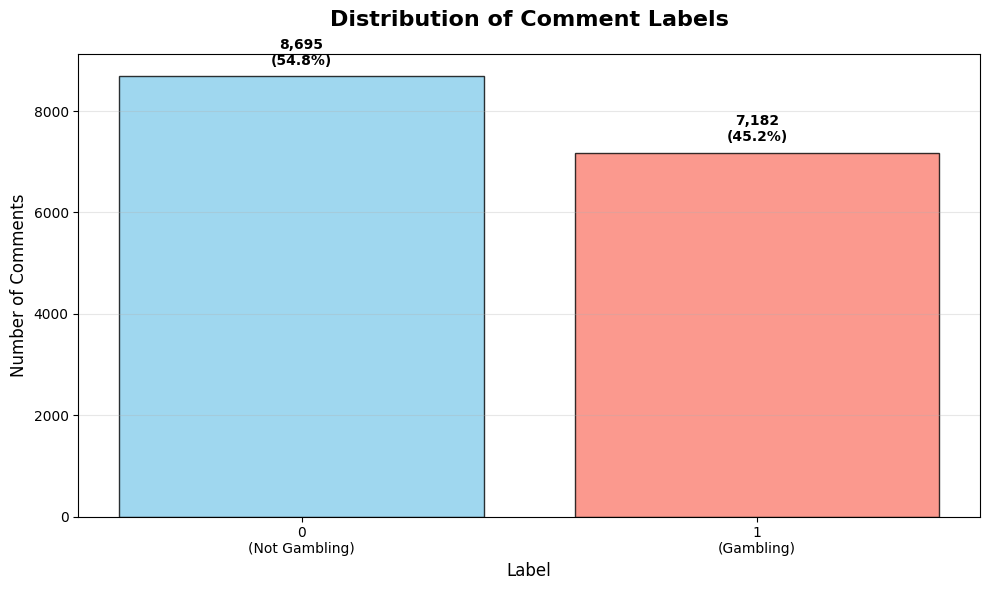

In [13]:
# Create visualization
plt.figure(figsize=(10, 6))

# Bar plot
bars = plt.bar(range(len(label_counts)), label_counts.values,
               color=['skyblue', 'salmon'], alpha=0.8, edgecolor='black', linewidth=1)

# Customize plot
plt.title('Distribution of Comment Labels', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.xticks(range(len(label_counts)),
           [f'{label}\n({"Not Gambling" if label == 0 else "Gambling"})'
            for label in label_counts.index])

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, label_counts.values)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + len(df_combined) * 0.01,
             f'{count:,}\n({(count/len(df_combined)*100):.1f}%)',
             ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Analisis Sample

In [14]:
# Show samples of each label
for label in [0, 1]:
    label_name = "NOT GAMBLING" if label == 0 else "GAMBLING"
    sample_comments = df_combined[df_combined['label'] == label].sample(min(5, len(df_combined[df_combined['label'] == label])))

    print(f"\n{label_name} SAMPLES:")
    print("=" * 50)

    for _, row in sample_comments.iterrows():
        print(f"Original: {row['comment']}")
        print(f"Cleaned:  {row['cleaned_comment']}")
        if label == 1:
            keywords = label_processor.get_detected_keywords(row['cleaned_comment'])
            print(f"Keywords: {keywords}")
        print("-" * 40)


NOT GAMBLING SAMPLES:
Original: Papua seharusnya diselesaikan dgn cara bijak secara diplomatika ,jgn mengorbankan jiwa untuk raga karna itu satu satu kesatuan jiwa raga ,papua adalah indonesia
Cleaned:  papua seharusnya diselesaikan dgn cara bijak secara diplomatika jgn mengorbankan jiwa untuk raga karna itu satu satu kesatuan jiwa raga papua adalah indonesia
----------------------------------------
Original: Rismon ahli tai
Cleaned:  rismon ahli tai
----------------------------------------
Original: Rismon & roy, sama" Ribet, bodohnya sangat kelihatan
Cleaned:  rismon roy sama ribet bodohnya sangat kelihatan
----------------------------------------
Original: Tapi memang benar menurut YouTube para tentara dan polisi di sana. Mereka lihat dan rekam sendiri keadaan yang sangat menyedihkan, sampai ikut bilang kenapa kodisi masyarakat, jalan, sarana sosial tidak cepat dibenahi - bahkan ikut mengkritik pemerintah daerah. Mereka juga ikut kasihan melihat kondisi masyarakat bawah, apalagi ya

# Simpan Hasil

untuk dilakukan verifikasi labeling secara manual

In [16]:
# Define output path
output_path = '/content/drive/MyDrive/Capstone/Dataset/labeled_comments.csv'

try:
    # Save the processed dataset
    df_combined.to_csv(output_path, index=False)
    print(f"Dataset saved successfully to: {output_path}")
    print(f"Saved {len(df_combined):,} labeled comments")
    print(f"Columns saved: {list(df_combined.columns)}")

    # Verify the saved file
    saved_df = pd.read_csv(output_path)
    print(f"Verification: Loaded {len(saved_df)} rows from saved file")

except Exception as e:
    print(f"Error saving file: {str(e)}")

Dataset saved successfully to: /content/drive/MyDrive/Capstone/Dataset/labeled_comments.csv
Saved 15,877 labeled comments
Columns saved: ['author', 'comment', 'normalized_comment', 'cleaned_comment', 'label']
Verification: Loaded 15877 rows from saved file
